In [ ]:
"""Raw data creation"""

import os
import sys

root_directory = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if root_directory not in sys.path:
    sys.path.append(root_directory)
    
from polygon_segmentation_with_gcn.src.config import DataConfiguration
from polygon_segmentation_with_gcn.src.data_creator import DataCreator

data_creator = DataCreator(
    shp_dir=DataConfiguration.SHP_PATH,
    save_dir=DataConfiguration.SAVE_RAW_PATH,
    is_debug_mode=False,
    save_qa_image=True,
)

data_creator.create()

In [4]:
import os
import sys
import pandas as pd
import copy
import warnings
import numpy as np

root_directory = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if root_directory not in sys.path:
    sys.path.append(root_directory)
    
from polygon_segmentation_with_gcn.src.config import DataConfiguration
from polygon_segmentation_with_gcn.src import commonutils
from polygon_segmentation_with_gcn.src.data_creator import DataCreatorHelper

commonutils.add_debugvisualizer(globals())
warnings.filterwarnings("ignore") 

irregulars_dict = {}
regulars_dict = {}

for raw_data_folder in os.listdir(DataConfiguration.SAVE_RAW_PATH):
    os.makedirs(os.path.join(DataConfiguration.SAVE_PATH, raw_data_folder), exist_ok=True)
    
    regulars_dict[raw_data_folder] = {"gdf": None, "loc_to_exclude": []}
    irregulars_dict[raw_data_folder] = {"gdf": None, "loc_to_exclude": []}
    
    raw_data_files = os.listdir(os.path.join(DataConfiguration.SAVE_RAW_PATH, raw_data_folder))
    for raw_data_file in raw_data_files:
        if not raw_data_file.endswith(".pkl"):
            continue
        
        raw_data_file_path = os.path.join(DataConfiguration.SAVE_RAW_PATH, raw_data_folder, raw_data_file)
        raw_dataframe = pd.read_pickle(raw_data_file_path)
        
        raw_dataframe["i"] = range(raw_dataframe.shape[0])
        raw_dataframe["refined_edge_label_index_only"] = [None] * raw_dataframe.shape[0]
        
        if raw_data_file.startswith("lands_gdf_irregular"):
            irregulars_dict[raw_data_folder]["gdf"] = raw_dataframe
        elif raw_data_file.startswith("lands_gdf_regular"):
            regulars_dict[raw_data_folder]["gdf"] = raw_dataframe
        else:
            raise ValueError(f"Invalid file name: {raw_data_file}")

In [5]:
seoul_dobonggu_irregulars = irregulars_dict["seoul-dobonggu"]["gdf"]

seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[47] = np.array([[7], [15]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[251] = np.array([[8], [19]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[315] = np.array([[8], [15]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[1017] = np.array([[7], [21]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[1020] = np.array([[7], [16]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[2775] = np.array([[3], [14]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[3797] = np.array([[5], [18]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[4519] = np.array([[5], [16]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[4993] = np.array([[10], [17]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[5591] = np.array([[5], [11]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[5940] = np.array([[8], [18]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[6137] = np.array([[1], [9]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[6240] = np.array([[10], [20]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[6912] = np.array([[3], [16]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[7099] = np.array([[5], [12]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[7161] = np.array([[3], [14]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[7257] = np.array([[3], [16]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[7260] = np.array([[5], [16]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[7295] = np.array([[4], [11]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[8305] = np.array([[5], [17]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[11391] = np.array([[3], [15]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[11563] = np.array([[5], [34]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[12203] = np.array([[7], [14]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[12293] = np.array([[8], [18]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[14903] = np.array([[5], [15]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[15662] = np.array([[5], [11]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[17344] = np.array([[8], [20]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[17376] = np.array([[2], [23]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[17397] = np.array([[3], [14]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[17484] = np.array([[9], [17]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[17555] = np.array([[6], [20]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[17562] = np.array([[3], [15]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[18107] = np.array([[2], [16]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[18138] = np.array([[14], [22]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[18316] = np.array([[2], [12]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[18449] = np.array([[3], [10]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[18557] = np.array([[4], [20]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[18667] = np.array([[4], [10]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[18668] = np.array([[6], [10]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[19166] = np.array([[1], [8]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[19194] = np.array([[11], [18]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[19200] = np.array([[2], [16]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[19234] = np.array([[2], [12]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[19266] = np.array([[6], [18]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[19283] = np.array([[6], [17]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[19526] = np.array([[3], [11]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[20245] = np.array([[7], [14]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[20438] = np.array([[4], [17]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[20473] = np.array([[4], [16]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[22256] = np.array([[1], [12]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[22283] = np.array([[4], [20]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[22480] = np.array([[13], [21]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[22484] = np.array([[4], [13]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[22514] = np.array([[2], [10]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[22567] = np.array([[0], [10]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[11577] = np.array([[4], [8]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[4719] = np.array([[0, 11], [8, 17]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[6199] = np.array([[1, 4], [16, 11]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[6246] = np.array([[2, 13], [11, 20]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[11472] = np.array([[3, 11], [24, 23]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[22388] = np.array([[9, 13], [26, 18]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[22540] = np.array([[13, 25], [20, 32]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[22181] = np.array([[0, 11], [18, 18]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[18693] = np.array([[3, 13], [11, 19]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[18836] = np.array([[12, 4], [16, 19]])
seoul_dobonggu_irregulars.refined_edge_label_index_only.loc[19071] = np.array([[2, 4], [15, 10]])

irregulars_dict["seoul-dobonggu"]["loc_to_exclude"] = [
    1818, 
    2467, 
    2518, 
    5355, 
    6239, 
    6452, 
    6832, 
    11911, 
    11914, 
    12217, 
    12251, 
    12284, 
    17333, 
    17450, 
    17521, 
    17746, 
    18031, 
    18240,
    18252,
    18697,
    19098,
    22213,
    22238,
    22373,
    22567,
    22577
]

In [6]:
seoul_dongdaemungu_irregulars = irregulars_dict["seoul-dongdaemungu"]["gdf"]

seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[3544] = np.array([[9], [15]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[3602] = np.array([[3, 10], [21, 18]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[4104] = np.array([[4], [18]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[4630] = np.array([[9], [20]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[4711] = np.array([[5], [11]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[5185] = np.array([[11], [21]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[6188] = np.array([[2, 10], [7, 17]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[6397] = np.array([[15], [25]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[6736] = np.array([[5], [11]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[7452] = np.array([[2], [11]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[7507] = np.array([[6], [18]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[8388] = np.array([[4], [14]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[9811] = np.array([[11], [19]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[11397] = np.array([[1], [15]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[11410] = np.array([[4], [14]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[11647] = np.array([[3], [11]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[11756] = np.array([[4], [15]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[11998] = np.array([[2], [10]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[12636] = np.array([[14], [20]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[12755] = np.array([[8], [13]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[12876] = np.array([[7], [22]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[13415] = np.array([[5, 14], [21, 20]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[13578] = np.array([[5], [13]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[14736] = np.array([[7], [15]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[15372] = np.array([[3], [11]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[15780] = np.array([[6], [13]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[15990] = np.array([[4], [9]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[16115] = np.array([[11], [16]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[16339] = np.array([[4], [12]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[16655] = np.array([[7], [15]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[17489] = np.array([[6, 9], [22, 13]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[19339] = np.array([[1, 14], [9, 21]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[19994] = np.array([[1], [7]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[21685] = np.array([[3], [10]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[24848] = np.array([[1], [12]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[25019] = np.array([[3, 13], [20, 19]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[25172] = np.array([[7], [17]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[25494] = np.array([[3], [16]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[26262] = np.array([[7], [20]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[27010] = np.array([[3], [11]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[27013] = np.array([[4], [14]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[27117] = np.array([[6], [12]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[27620] = np.array([[6], [20]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[28413] = np.array([[7], [19]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[29241] = np.array([[7], [32]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[29934] = np.array([[12], [21]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[31128] = np.array([[2], [8]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[31191] = np.array([[3], [20]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[31213] = np.array([[1], [11]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[31361] = np.array([[3], [14]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[31505] = np.array([[2], [14]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[32418] = np.array([[3, 5], [16, 11]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[32535] = np.array([[5], [12]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[32988] = np.array([[6], [17]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[33106] = np.array([[5], [16]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[33140] = np.array([[1], [9]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[34740] = np.array([[4, 6], [16, 9]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[34988] = np.array([[5], [15]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[35072] = np.array([[5], [16]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[35861] = np.array([[2], [8]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[35971] = np.array([[10], [20]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[36574] = np.array([[4], [19]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[38157] = np.array([[17], [26]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[38162] = np.array([[4], [18]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[38532] = np.array([[2], [18]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[38702] = np.array([[3], [18]])
seoul_dongdaemungu_irregulars.refined_edge_label_index_only.loc[39142] = np.array([[1], [9]])

irregulars_dict["seoul-dongdaemungu"]["loc_to_exclude"] = [
    5165,
    7493,
    8636,
    10753,
    13519,
    14361,
    15891,
    24887,
    25015,
    27542,
    28997,
    29047,
    29098,
    31793,
    32909,
    34747,
    35296,
    35979,
    36358,
    36667,
    37074,
    37625,
    38608,
    39718,
]

In [7]:
seoul_eunpyeonggu_irregulars = irregulars_dict["seoul-eunpyeonggu"]["gdf"]

seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[388] = np.array([[3], [16]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[523] = np.array([[3, 2], [14, 19]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[590] = np.array([[7, 9], [17, 13]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[611] = np.array([[2], [12]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[642] = np.array([[3, 3], [27, 18]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[772] = np.array([[4], [18]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[1086] = np.array([[7], [17]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[1108] = np.array([[7], [20]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[1821] = np.array([[7], [14]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[2233] = np.array([[5], [17]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[2266] = np.array([[7], [29]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[2507] = np.array([[1], [12]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[2792] = np.array([[4], [17]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[2879] = np.array([[8], [15]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[4353] = np.array([[0], [6]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[4866] = np.array([[4], [17]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[5694] = np.array([[2], [15]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[5872] = np.array([[2], [11]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[5996] = np.array([[0], [12]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[6371] = np.array([[3], [18]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[6434] = np.array([[8, 11], [25, 23]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[6479] = np.array([[19], [30]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[6979] = np.array([[2], [20]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[7045] = np.array([[4], [14]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[7395] = np.array([[1], [9]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[7751] = np.array([[11], [18]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[7831] = np.array([[2], [7]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[9090] = np.array([[5], [14]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[9603] = np.array([[4], [11]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[10596] = np.array([[4], [12]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[10887] = np.array([[6], [12]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[10930] = np.array([[4], [14]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[10998] = np.array([[6], [14]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[11827] = np.array([[1], [13]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[11991] = np.array([[4, 8], [17, 15]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[11957] = np.array([[1], [8]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[12045] = np.array([[2], [15]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[12072] = np.array([[2], [13]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[12092] = np.array([[4], [14]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[12502] = np.array([[3], [10]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[13091] = np.array([[9], [21]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[13135] = np.array([[3, 7], [23, 18]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[13201] = np.array([[4], [13]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[13242] = np.array([[15], [25]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[13266] = np.array([[8, 4], [17, 22]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[13291] = np.array([[6], [17]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[13365] = np.array([[5, 2], [13, 18]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[13740] = np.array([[5], [17]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[14993] = np.array([[0], [13]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[16006] = np.array([[20, 6], [28, 12]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[19104] = np.array([[3], [14]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[20145] = np.array([[11], [24]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[20186] = np.array([[2], [8]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[20856] = np.array([[2], [16]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[21705] = np.array([[6], [13]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[22340] = np.array([[0, 3], [14, 12]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[23300] = np.array([[8], [15]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[23435] = np.array([[1], [10]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[23504] = np.array([[6], [13]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[23789] = np.array([[3], [11]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[25229] = np.array([[6], [16]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[25889] = np.array([[3], [14]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[25892] = np.array([[9], [20]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[26054] = np.array([[5], [31]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[26576] = np.array([[8], [16]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[28935] = np.array([[6], [19]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[29156] = np.array([[3], [13]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[31290] = np.array([[4], [13]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[32176] = np.array([[5], [14]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[32620] = np.array([[5], [18]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[32621] = np.array([[19, 2], [28, 16]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[32625] = np.array([[4], [17]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[32627] = np.array([[1], [12]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[32668] = np.array([[6], [18]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[32680] = np.array([[5], [15]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[32941] = np.array([[4], [14]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[37160] = np.array([[5], [11]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[38779] = np.array([[12], [16]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[38886] = np.array([[5], [17]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[39240] = np.array([[2], [17]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[39727] = np.array([[2], [11]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[40452] = np.array([[4], [14]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[40840] = np.array([[12], [17]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[41258] = np.array([[15], [23]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[41270] = np.array([[6], [18]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[41326] = np.array([[13, 7], [26, 26]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[41356] = np.array([[7], [18]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[41365] = np.array([[0], [15]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[41442] = np.array([[0], [14]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[43050] = np.array([[10], [16]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[43054] = np.array([[7], [20]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[45128] = np.array([[4, 6], [16, 13]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[45706] = np.array([[9], [17]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[46065] = np.array([[7], [15]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[46074] = np.array([[2], [8]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[46114] = np.array([[14], [21]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[46484] = np.array([[3], [19]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[46511] = np.array([[4], [10]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[46578] = np.array([[7], [19]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[46706] = np.array([[2], [9]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[46750] = np.array([[4], [13]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[46794] = np.array([[8], [19]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[46814] = np.array([[1, 3], [14, 8]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[46855] = np.array([[10], [17]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[46881] = np.array([[7], [17]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[46957] = np.array([[4], [20]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[46979] = np.array([[4], [16]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[46990] = np.array([[4], [14]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[47039] = np.array([[11], [23]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[47044] = np.array([[8], [16]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[47060] = np.array([[4], [12]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[47096] = np.array([[5], [13]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[47104] = np.array([[0], [12]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[47139] = np.array([[3], [14]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[47225] = np.array([[2], [12]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[47233] = np.array([[7], [13]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[47237] = np.array([[7], [13]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[47284] = np.array([[4, 10], [18, 16]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[47345] = np.array([[3], [13]])
seoul_eunpyeonggu_irregulars.refined_edge_label_index_only.loc[47428] = np.array([[3], [18]])

irregulars_dict["seoul-eunpyeonggu"]["loc_to_exclude"] = [
    196,
    707,
    2657,
    2972,
    3282,
    5931,
    6343,
    6391,
    6429,
    6462,
    6881,
    6983,
    7089,
    8996,
    11271,
    13255,
    14643,
    17023,
    20150,
    21313,
    21592,
    24058,
    31169,
    37081,
    38988,
    39099,
    39317,
    39693,
    39778,
    40349,
    45581,
    45606,
    45698,
    45721,
    46334,
    46571,
    46890,
    46996,
    47148,
    47180,
    47257,
    47501
]


In [8]:
seoul_gangbukgu_irregulars = irregulars_dict["seoul-gangbukgu"]["gdf"]

seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[254] = np.array([[7], [22]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[818] = np.array([[11], [20]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[9628] = np.array([[3, 5], [16, 11]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[9900] = np.array([[5], [16]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[10586] = np.array([[11], [18]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[11074] = np.array([[4], [9]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[13093] = np.array([[3], [14]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[13365] = np.array([[11], [19]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[13421] = np.array([[3], [14]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[14303] = np.array([[5], [20]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[15070] = np.array([[2], [11]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[15094] = np.array([[16], [22]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[15147] = np.array([[5], [16]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[15817] = np.array([[4], [19]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[17129] = np.array([[3], [14]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[17137] = np.array([[4], [10]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[17193] = np.array([[0], [7]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[17211] = np.array([[4], [16]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[17807] = np.array([[0], [9]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[17841] = np.array([[0], [14]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[21466] = np.array([[4], [14]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[21620] = np.array([[6], [21]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[21654] = np.array([[9], [16]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[22799] = np.array([[6], [15]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[25436] = np.array([[10], [19]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[26633] = np.array([[5], [13]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[29277] = np.array([[0], [12]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[30089] = np.array([[3], [16]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[32085] = np.array([[11], [19]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[32099] = np.array([[14], [19]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[32982] = np.array([[4], [11]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[33059] = np.array([[18], [39]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[33227] = np.array([[25], [38]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[33749] = np.array([[5], [29]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[34991] = np.array([[12], [20]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[35562] = np.array([[7, 17], [15, 23]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[37349] = np.array([[3, 13], [13, 19]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[37370] = np.array([[6], [14]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[37466] = np.array([[7], [20]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[37538] = np.array([[13], [24]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[38137] = np.array([[13], [7]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[38900] = np.array([[0], [12]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[39470] = np.array([[5], [17]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[39524] = np.array([[8], [24]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[39585] = np.array([[2], [8]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[39662] = np.array([[5], [10]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[39667] = np.array([[6], [21]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[39668] = np.array([[14, 7], [19, 25]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[40053] = np.array([[2], [16]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[40098] = np.array([[2], [12]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[40099] = np.array([[7], [14]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[40111] = np.array([[1], [15]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[40197] = np.array([[17], [21]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[40198] = np.array([[8], [17]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[40199] = np.array([[2], [14]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[40211] = np.array([[4], [14]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[40243] = np.array([[0], [11]])
seoul_gangbukgu_irregulars.refined_edge_label_index_only.loc[40289] = np.array([[20, 12], [31, 20]])

irregulars_dict["seoul-gangbukgu"]["loc_to_exclude"] = [
    3856,
    8205,
    9724,
    13959,
    16924,
    17074,
    17250,
    17789,
    18026,
    18067,
    18079,
    21316,
    21602,
    31036,
    31247,
    33060,
    33252,
    33571,
    33852,
    35437,
    35557,
    37366,
    37368,
    37376,
    37380,
    37511,
    38496,
    38584,
    38891,
    39383,
    39900,
    40047,
    40110,
    40196,
]

In [9]:
seoul_gangseogu_irregulars = irregulars_dict["seoul-gangseogu"]["gdf"]

seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[84] = np.array([[3], [18]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[194] = np.array([[2], [15]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[254] = np.array([[0], [11]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[3767] = np.array([[4], [11]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[3791] = np.array([[11], [21]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[3803] = np.array([[11], [15]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[3809] = np.array([[4], [15]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[4792] = np.array([[2], [14]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[20657] = np.array([[4, 7], [21, 11]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[10195] = np.array([[1, 18], [14, 28]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[20846] = np.array([[2], [37]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[20902] = np.array([[4], [17]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[20909] = np.array([[6], [24]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[20918] = np.array([[6], [12]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[20993] = np.array([[11], [18]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[21011] = np.array([[4], [15]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[21400] = np.array([[3], [20]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[21565] = np.array([[14], [21]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[21582] = np.array([[10], [16]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[21623] = np.array([[11], [16]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[22072] = np.array([[5], [15]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[22240] = np.array([[1], [14]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[22255] = np.array([[4], [18]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[22376] = np.array([[0], [8]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[22393] = np.array([[5], [13]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[22932] = np.array([[12], [17]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[24887] = np.array([[7], [18]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[25234] = np.array([[3], [7]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[25294] = np.array([[2], [12]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[25898] = np.array([[5], [22]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[26933] = np.array([[13], [20]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[30318] = np.array([[4], [10]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[34627] = np.array([[6], [13]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[33880] = np.array([[4], [19]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[35402] = np.array([[2], [13]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[35484] = np.array([[1], [11]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[35674] = np.array([[7], [14]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[35736] = np.array([[1], [13]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[35820] = np.array([[9], [15]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[35828] = np.array([[6], [17]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[37602] = np.array([[5], [27]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[38298] = np.array([[7], [19]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[38300] = np.array([[4], [12]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[38368] = np.array([[0], [9]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[38498] = np.array([[10], [19]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[40008] = np.array([[6], [12]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[40025] = np.array([[6], [13]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[40056] = np.array([[2], [11]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[40163] = np.array([[2], [13]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[40172] = np.array([[5], [13]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[40207] = np.array([[1], [13]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[40851] = np.array([[12], [42]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[41077] = np.array([[7], [17]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[41096] = np.array([[2], [9]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[41162] = np.array([[8], [20]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[41166] = np.array([[4], [17]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[41330] = np.array([[10], [18]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[41358] = np.array([[7], [29]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[41375] = np.array([[6], [11]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[41394] = np.array([[4], [17]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[41404] = np.array([[17], [22]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[41448] = np.array([[4], [16]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[41836] = np.array([[7], [12]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[41837] = np.array([[5], [12]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[42709] = np.array([[11], [19]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[26444] = np.array([[14], [21]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[29360] = np.array([[10], [18]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[40079] = np.array([[9], [15]])
seoul_gangseogu_irregulars.refined_edge_label_index_only.loc[31381] = np.array([[1], [10]])

irregulars_dict["seoul-gangseogu"]["loc_to_exclude"] = [
    11,
    1026,
    42604,
    42607,
    42664,
    41281,
    40217,
    39965,
    37678,
    38589,
    39885,
    39947,
    38301,
    38026,
    38060,
    38162,
    20993,
    29482,
    30889,
    34796,
    29665,
    20998,
    21624,
    22042,
    22408,
    25130,
    25283,
    27300,
    35478,
]

In [10]:
seoul_geumcheongu_irregulars = irregulars_dict["seoul-geumcheongu"]["gdf"]

seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[640] = np.array([[3], [10]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[1419] = np.array([[5], [15]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[1859] = np.array([[2], [11]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[1883] = np.array([[7], [20]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[4430] = np.array([[9], [21]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[4984] = np.array([[11], [25]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[4991] = np.array([[10], [22]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[5061] = np.array([[3], [10]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[8196] = np.array([[4], [16]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[9098] = np.array([[4], [15]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[10796] = np.array([[12], [17]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[11630] = np.array([[7], [20]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[11779] = np.array([[8], [16]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[11806] = np.array([[10, 0], [18, 7]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[12034] = np.array([[3], [9]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[12028] = np.array([[2], [18]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[12510] = np.array([[9], [15]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[12553] = np.array([[6], [12]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[19453] = np.array([[4], [22]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[18682] = np.array([[3], [16]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[18629] = np.array([[8], [13]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[19510] = np.array([[10, 8], [18, 22]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[19621] = np.array([[4], [17]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[19622] = np.array([[2], [14]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[19770] = np.array([[4], [17]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[19855] = np.array([[2], [13]])
seoul_geumcheongu_irregulars.refined_edge_label_index_only.loc[19858] = np.array([[7], [13]])

irregulars_dict["seoul-geumcheongu"]["loc_to_exclude"] = [
    12324,
    19674,
    19684,
    12657,
]

In [11]:
seoul_gurogu_irregulars = irregulars_dict["seoul-gurogu"]["gdf"]

seoul_gurogu_irregulars.refined_edge_label_index_only.loc[3812] = np.array([[0], [10]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[3940] = np.array([[5], [16]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[4789] = np.array([[15], [22]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[7988] = np.array([[8], [17]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[5669] = np.array([[4], [12]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[8256] = np.array([[2], [12]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[9680] = np.array([[2], [12]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[11528] = np.array([[6], [20]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[11486] = np.array([[5], [15]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[10845] = np.array([[1], [9]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[10051] = np.array([[7], [17]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[11542] = np.array([[6], [19]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[14447] = np.array([[6], [15]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[14886] = np.array([[4], [23]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[14979] = np.array([[9], [16]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[15073] = np.array([[9], [16]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[15660] = np.array([[1], [15]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[15790] = np.array([[3], [17]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[16372] = np.array([[2], [17]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[16970] = np.array([[2], [13]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[17396] = np.array([[5], [15]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[17863] = np.array([[3], [14]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[18397] = np.array([[2], [11]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[18522] = np.array([[4], [20]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[18573] = np.array([[11], [20]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[18807] = np.array([[13], [18]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[19390] = np.array([[7, 4], [18, 28]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[20018] = np.array([[4], [18]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[20325] = np.array([[2], [10]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[21207] = np.array([[5], [17]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[21630] = np.array([[8], [19]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[21939] = np.array([[5], [17]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[22220] = np.array([[5], [17]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[25709] = np.array([[6], [19]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[25711] = np.array([[3], [13]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[26459] = np.array([[1], [13]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[26923] = np.array([[16], [11]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[27384] = np.array([[10], [14]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[27388] = np.array([[4], [31]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[27409] = np.array([[0], [16]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[28012] = np.array([[3], [13]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[28214] = np.array([[11], [18]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[28423] = np.array([[10], [17]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[28514] = np.array([[5], [22]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[29039] = np.array([[10], [20]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[29686] = np.array([[12], [25]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[30545] = np.array([[3], [8]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[30587] = np.array([[4], [14]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[30690] = np.array([[0], [12]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[30805] = np.array([[0], [9]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[30858] = np.array([[3], [11]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[30923] = np.array([[9], [17]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[30982] = np.array([[7], [19]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[31734] = np.array([[5], [13]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[31755] = np.array([[4], [16]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[31855] = np.array([[3], [18]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[31873] = np.array([[7], [13]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[31900] = np.array([[2], [12]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[32205] = np.array([[6], [20]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[32239] = np.array([[11], [20]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[32268] = np.array([[2], [16]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[32296] = np.array([[4], [14]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[32533] = np.array([[0, 5], [21, 16]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[33083] = np.array([[5], [16]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[33428] = np.array([[10], [19]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[33465] = np.array([[12], [20]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[33482] = np.array([[1], [8]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[33662] = np.array([[1], [17]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[33730] = np.array([[11], [20]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[34215] = np.array([[4], [10]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[36091] = np.array([[12, 2], [18, 10]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[18142] = np.array([[16], [22]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[21224] = np.array([[0], [12]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[21812] = np.array([[4], [16]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[23242] = np.array([[4], [18]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[28543] = np.array([[4], [18]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[29271] = np.array([[4], [17]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[29172] = np.array([[4], [17]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[29105] = np.array([[5], [14]])
seoul_gurogu_irregulars.refined_edge_label_index_only.loc[30589] = np.array([[0], [10]])

irregulars_dict["seoul-gurogu"]["loc_to_exclude"] = [
    640,
    4779,
    36124,
    36040,
    35575,
    35262,
    35082,
    35079,
    34500,
    34185,
    33576,
    33513,
    33474,
    32839,
    32813,
    32272,
    32276,
    32000,
    31986,
    31978,
    31875,
    31825,
    31413,
    31743,
    28134,
    30878,
    28453,
    29758,
    29768,
    29840,
    29890,
    28874,
    28899,
    27353,
    20516,
    22030,
    21578,
    21845,
    21552,
    19082,
    19727,
    14490,
    14666,
    14701,
    7913,
    9439,
    9739,
    9788,
    12277,
    12947,
    14205,
]

In [13]:
loc = 640

seoul_gurogu_irregulars = irregulars_dict["seoul-gurogu"]["gdf"]

sg = seoul_gurogu_irregulars.loc[loc].simplified_geometry
es = seoul_gurogu_irregulars.loc[loc].splitters

a=1

In [ ]:
excluded_gdf = copy.deepcopy(irregulars_dict["seoul-dobonggu"]["gdf"])
excluded_gdf.drop(excluded_gdf.index, inplace=True)

The function visualize_gdf_geometries_as_grid took 13.009777069091797 seconds to run.
The function visualize_gdf_geometries_as_grid took 13.426758766174316 seconds to run.
The function visualize_gdf_geometries_as_grid took 24.083885431289673 seconds to run.
The function visualize_gdf_geometries_as_grid took 16.073124408721924 seconds to run.
The function visualize_gdf_geometries_as_grid took 16.377954483032227 seconds to run.
The function visualize_gdf_geometries_as_grid took 4.579901933670044 seconds to run.


IndexError: list index out of range

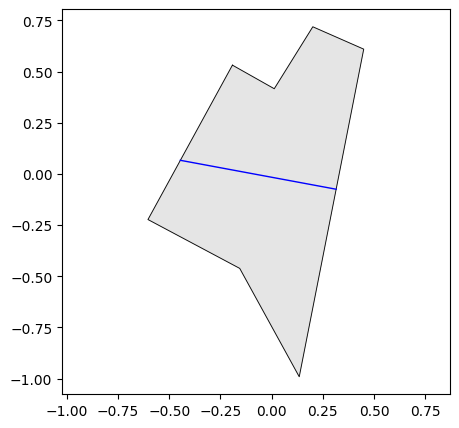

In [12]:
import os
import sys

root_directory = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if root_directory not in sys.path:
    sys.path.append(root_directory)
    
from polygon_segmentation_with_gcn.src.config import DataConfiguration
from polygon_segmentation_with_gcn.src.data_creator import DataCreator

data_creator_dummy = DataCreator(shp_dir=None, save_dir=None)

# Apply refined data to the irregulars_gdf
for folder_name, irregular_dict in irregulars_dict.items():
    
    if "gurogu" not in folder_name:
        continue
    
    refined_irregular_gdf = irregular_dict["gdf"]
    
    for loc, row in refined_irregular_gdf.iterrows():
        
        if loc in irregular_dict["loc_to_exclude"]:
            refined_irregular_gdf.edge_label_index.loc[loc] = (
                row.edge_label_index[:, :-row.edge_label_index_only.shape[1]]
            )
            
            refined_irregular_gdf.splitters.loc[loc] = None
            refined_irregular_gdf.edge_label_index_only.loc[loc] = np.array([[None], [None]])
        
        if row.refined_edge_label_index_only is not None:
           refined_irregular_gdf.edge_label_index_only.loc[loc] = row.refined_edge_label_index_only
           
           refined_irregular_gdf.edge_label_index.loc[loc] = (
               row.edge_label_index[:, :-row.edge_label_index_only.shape[1]]
           )
           
           refined_irregular_gdf.edge_label_index.loc[loc] = np.hstack(
               [refined_irregular_gdf.edge_label_index.loc[loc], row.refined_edge_label_index_only]
            )
           
    data_creator_dummy.visualize_gdf_geometries_as_grid(
        lands_gdf=refined_irregular_gdf,
        save_path=os.path.join(DataConfiguration.SAVE_PATH, folder_name, DataConfiguration.LANDS_GDF_IRREGULAR_PNG),
        max_size_to_visualize=500,
    )
    
    

In [ ]:
# List[Data]
# Data(x=row.features, edge_weight=row.edge_weight, edge_index=row.edge_index, edge_label_index=edge_label_index)